In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("sql_query.csv")
df.head()

,flight_id,scheduled_departure,scheduled_duration,departure_city,arrival_airport_name,arrival_city,model,range,passengers,max_passengers,total_amount
0,136119,2017-01-03T10:05:00Z,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,Анапа,Шереметьево,Москва,Boeing 737-300,4200,113.0,130,6865300.0
1,136120,2017-02-24T10:05:00Z,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,Анапа,Шереметьево,Москва,Boeing 737-300,4200,109.0,130,5434800.0
2,136122,2017-01-08T10:05:00Z,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,Анапа,Шереметьево,Москва,Boeing 737-300,4200,97.0,130,5411400.0
3,136130,2017-02-13T10:05:00Z,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,Анапа,Шереметьево,Москва,Boeing 737-300,4200,107.0,130,5795200.0
4,136131,2017-01-28T10:05:00Z,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,Анапа,Шереметьево,Москва,Boeing 737-300,4200,124.0,130,7111900.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   flight_id             127 non-null    int64  
 1   scheduled_departure   127 non-null    object 
 2   scheduled_duration    127 non-null    object 
 3   departure_city        127 non-null    object 
 4   arrival_airport_name  127 non-null    object 
 5   arrival_city          127 non-null    object 
 6   model                 127 non-null    object 
 7   range                 127 non-null    int64  
 8   passengers            118 non-null    float64
 9   max_passengers        127 non-null    int64  
 10  total_amount          118 non-null    float64
dtypes: float64(2), int64(3), object(6)
memory usage: 11.0+ KB


In [4]:
df[df.passengers.isnull()]

,flight_id,scheduled_departure,scheduled_duration,departure_city,arrival_airport_name,arrival_city,model,range,passengers,max_passengers,total_amount
59,136511,2017-02-21T06:10:00Z,0 years 0 mons 0 days 5 hours 5 mins 0.00 secs,Анапа,Спиченково,Новокузнецк,Boeing 737-300,4200,NaN,130,NaN
60,136513,2017-02-28T06:10:00Z,0 years 0 mons 0 days 5 hours 5 mins 0.00 secs,Анапа,Спиченково,Новокузнецк,Boeing 737-300,4200,NaN,130,NaN
61,136514,2017-02-07T06:10:00Z,0 years 0 mons 0 days 5 hours 5 mins 0.00 secs,Анапа,Спиченково,Новокузнецк,Boeing 737-300,4200,NaN,130,NaN
62,136523,2017-01-10T06:10:00Z,0 years 0 mons 0 days 5 hours 5 mins 0.00 secs,Анапа,Спиченково,Новокузнецк,Boeing 737-300,4200,NaN,130,NaN
63,136540,2017-01-17T06:10:00Z,0 years 0 mons 0 days 5 hours 5 mins 0.00 secs,Анапа,Спиченково,Новокузнецк,Boeing 737-300,4200,NaN,130,NaN
64,136544,2017-01-31T06:10:00Z,0 years 0 mons 0 days 5 hours 5 mins 0.00 secs,Анапа,Спиченково,Новокузнецк,Boeing 737-300,4200,NaN,130,NaN
65,136546,2017-01-03T06:10:00Z,0 years 0 mons 0 days 5 hours 5 mins 0.00 secs,Анапа,Спиченково,Новокузнецк,Boeing 737-300,4200,NaN,130,NaN
66,136560,2017-01-24T06:10:00Z,0 years 0 mons 0 days 5 hours 5 mins 0.00 secs,Анапа,Спиченково,Новокузнецк,Boeing 737-300,4200,NaN,130,NaN
67,136567,2017-02-14T06:10:00Z,0 years 0 mons 0 days 5 hours 5 mins 0.00 secs,Анапа,Спиченково,Новокузнецк,Boeing 737-300,4200,NaN,130,NaN


В датасете отсутствует информация о пассажирах и сумме проданных билетов на рейсах в Новокузнецк.  
Удалим информацию по Новокузнецку.

In [20]:
df = df[df.arrival_city != 'Новокузнецк']

Переведем колонки "scheduled_departure" и "actual_departure" в формат datetime

In [7]:
df.scheduled_departure = pd.to_datetime(df.scheduled_departure)

Определим количество минут в колонке "scheduled_duration"

In [38]:
def convert_to_hours(row):
    minutes = int(row.split(" ")[6]) + int(row.split(" ")[8]) / 60
    return minutes

In [39]:
df['scheduled_duration_hours'] = df.scheduled_duration.apply(convert_to_hours)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   flight_id                   127 non-null    int64              
 1   scheduled_departure         127 non-null    datetime64[ns, UTC]
 2   scheduled_duration          127 non-null    object             
 3   departure_city              127 non-null    object             
 4   arrival_airport_name        127 non-null    object             
 5   arrival_city                127 non-null    object             
 6   model                       127 non-null    object             
 7   range                       127 non-null    int64              
 8   passengers                  118 non-null    float64            
 9   max_passengers              127 non-null    int64              
 10  total_amount                118 non-null    float64           

Создадим дополнительный признак отображающий загрузку самолета в процентах

In [17]:
df['loading'] = df.passengers / df.max_passengers

In [23]:
df.model.unique()

array(['Boeing 737-300', 'Sukhoi Superjet-100'], dtype=object)

![Расходы на полёт](flight_expenses.jpg)

Согласно информации министерства транспорта РФ (www.favt.gov.ru) стоимость тонны топлива в аэропорту Анапы варьировалась в районе 45000 рублей

К сожалению, производители не предоставляют информацию о расходе топлива, по данным из сети интернет расход самолета "Сухой Суперджет-100" - 1,7 т/ч, "Boeing 737-300" - 2,6 т/ч.  
Другая информация Боинг - 3.5 кг/км, Анапа - Москва 1210 км

In [44]:
def fuel_consumption(row):
    if row.model == 'Sukhoi Superjet-100':
        return 1.7
    elif row.model == 'Boeing 737-300':
        return 2.6

In [45]:
df['fuel_consumption'] = df.apply(fuel_consumption, axis=1)

In [46]:
df.apply(fuel_consumption, axis=1)

0      2.6
1      2.6
2      2.6
3      2.6
4      2.6
      ... 
122    1.7
123    1.7
124    1.7
125    1.7
126    1.7
Length: 118, dtype: float64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 126
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   flight_id                   118 non-null    int64              
 1   scheduled_departure         118 non-null    datetime64[ns, UTC]
 2   scheduled_duration          118 non-null    object             
 3   departure_city              118 non-null    object             
 4   arrival_airport_name        118 non-null    object             
 5   arrival_city                118 non-null    object             
 6   model                       118 non-null    object             
 7   range                       118 non-null    int64              
 8   passengers                  118 non-null    float64            
 9   max_passengers              118 non-null    int64              
 10  total_amount                118 non-null    float64           

In [ ]:
df['fuel_cost']

In [40]:
df

,flight_id,scheduled_departure,scheduled_duration,departure_city,arrival_airport_name,arrival_city,model,range,passengers,max_passengers,total_amount,scheduled_duration_minutes,loading,fuel_consumption,scheduled_duration_hours
0,136119,2017-01-03 10:05:00+00:00,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,Анапа,Шереметьево,Москва,Boeing 737-300,4200,113.0,130,6865300.0,100,0.869231,260.0,1.666667
1,136120,2017-02-24 10:05:00+00:00,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,Анапа,Шереметьево,Москва,Boeing 737-300,4200,109.0,130,5434800.0,100,0.838462,260.0,1.666667
2,136122,2017-01-08 10:05:00+00:00,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,Анапа,Шереметьево,Москва,Boeing 737-300,4200,97.0,130,5411400.0,100,0.746154,260.0,1.666667
3,136130,2017-02-13 10:05:00+00:00,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,Анапа,Шереметьево,Москва,Boeing 737-300,4200,107.0,130,5795200.0,100,0.823077,260.0,1.666667
4,136131,2017-01-28 10:05:00+00:00,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,Анапа,Шереметьево,Москва,Boeing 737-300,4200,124.0,130,7111900.0,100,0.953846,260.0,1.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,136936,2017-01-02 09:25:00+00:00,0 years 0 mons 0 days 0 hours 50 mins 0.00 secs,Анапа,Белгород,Белгород,Sukhoi Superjet-100,3000,82.0,97,3468500.0,50,0.845361,85.0,0.833333
123,136937,2017-01-03 09:25:00+00:00,0 years 0 mons 0 days 0 hours 50 mins 0.00 secs,Анапа,Белгород,Белгород,Sukhoi Superjet-100,3000,81.0,97,3572300.0,50,0.835052,85.0,0.833333
124,136951,2017-02-02 09:25:00+00:00,0 years 0 mons 0 days 0 hours 50 mins 0.00 secs,Анапа,Белгород,Белгород,Sukhoi Superjet-100,3000,90.0,97,4527100.0,50,0.927835,85.0,0.833333
125,136953,2017-02-27 09:25:00+00:00,0 years 0 mons 0 days 0 hours 50 mins 0.00 secs,Анапа,Белгород,Белгород,Sukhoi Superjet-100,3000,97.0,97,4719200.0,50,1.000000,85.0,0.833333


In [47]:
df['fuel_cost'] = df.fuel_consumption * df.scheduled_duration_hours * 45000

In [48]:
df.fuel_cost

0      195000.0
1      195000.0
2      195000.0
3      195000.0
4      195000.0
         ...   
122     63750.0
123     63750.0
124     63750.0
125     63750.0
126     63750.0
Name: fuel_cost, Length: 118, dtype: float64

In [60]:
df['profit'] = df.total_amount - df.fuel_cost

<AxesSubplot:xlabel='scheduled_departure', ylabel='profit'>

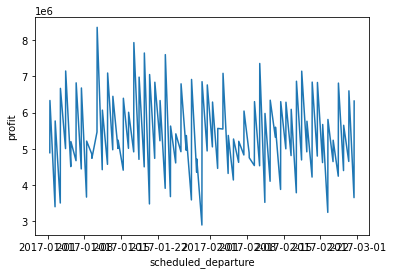

In [73]:
sns.lineplot(y=df.profit, x=df.scheduled_departure)

In [69]:
df

,flight_id,scheduled_departure,scheduled_duration,departure_city,arrival_airport_name,arrival_city,model,range,passengers,max_passengers,total_amount,scheduled_duration_minutes,loading,fuel_consumption,scheduled_duration_hours,fuel_cost,profit
0,136119,2017-01-03 10:05:00+00:00,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,Анапа,Шереметьево,Москва,Boeing 737-300,4200,113.0,130,6865300.0,100,0.869231,2.6,1.666667,195000.0,6670300.0
1,136120,2017-02-24 10:05:00+00:00,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,Анапа,Шереметьево,Москва,Boeing 737-300,4200,109.0,130,5434800.0,100,0.838462,2.6,1.666667,195000.0,5239800.0
2,136122,2017-01-08 10:05:00+00:00,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,Анапа,Шереметьево,Москва,Boeing 737-300,4200,97.0,130,5411400.0,100,0.746154,2.6,1.666667,195000.0,5216400.0
3,136130,2017-02-13 10:05:00+00:00,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,Анапа,Шереметьево,Москва,Boeing 737-300,4200,107.0,130,5795200.0,100,0.823077,2.6,1.666667,195000.0,5600200.0
4,136131,2017-01-28 10:05:00+00:00,0 years 0 mons 0 days 1 hours 40 mins 0.00 secs,Анапа,Шереметьево,Москва,Boeing 737-300,4200,124.0,130,7111900.0,100,0.953846,2.6,1.666667,195000.0,6916900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,136936,2017-01-02 09:25:00+00:00,0 years 0 mons 0 days 0 hours 50 mins 0.00 secs,Анапа,Белгород,Белгород,Sukhoi Superjet-100,3000,82.0,97,3468500.0,50,0.845361,1.7,0.833333,63750.0,3404750.0
123,136937,2017-01-03 09:25:00+00:00,0 years 0 mons 0 days 0 hours 50 mins 0.00 secs,Анапа,Белгород,Белгород,Sukhoi Superjet-100,3000,81.0,97,3572300.0,50,0.835052,1.7,0.833333,63750.0,3508550.0
124,136951,2017-02-02 09:25:00+00:00,0 years 0 mons 0 days 0 hours 50 mins 0.00 secs,Анапа,Белгород,Белгород,Sukhoi Superjet-100,3000,90.0,97,4527100.0,50,0.927835,1.7,0.833333,63750.0,4463350.0
125,136953,2017-02-27 09:25:00+00:00,0 years 0 mons 0 days 0 hours 50 mins 0.00 secs,Анапа,Белгород,Белгород,Sukhoi Superjet-100,3000,97.0,97,4719200.0,50,1.000000,1.7,0.833333,63750.0,4655450.0
